In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import colors
import soundfile as sf
import matplotlib.patches as patches
from pathlib import Path

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES, DC_COLOR_MAPPINGS, FREQ_GROUPS
from cli import get_file_paths

import bout_clustering as bt_clustering
import bout_plotting as bt_plt
import subsampling as ss
import data_handling as dh
import plotting
import pipeline

Telephone LF1


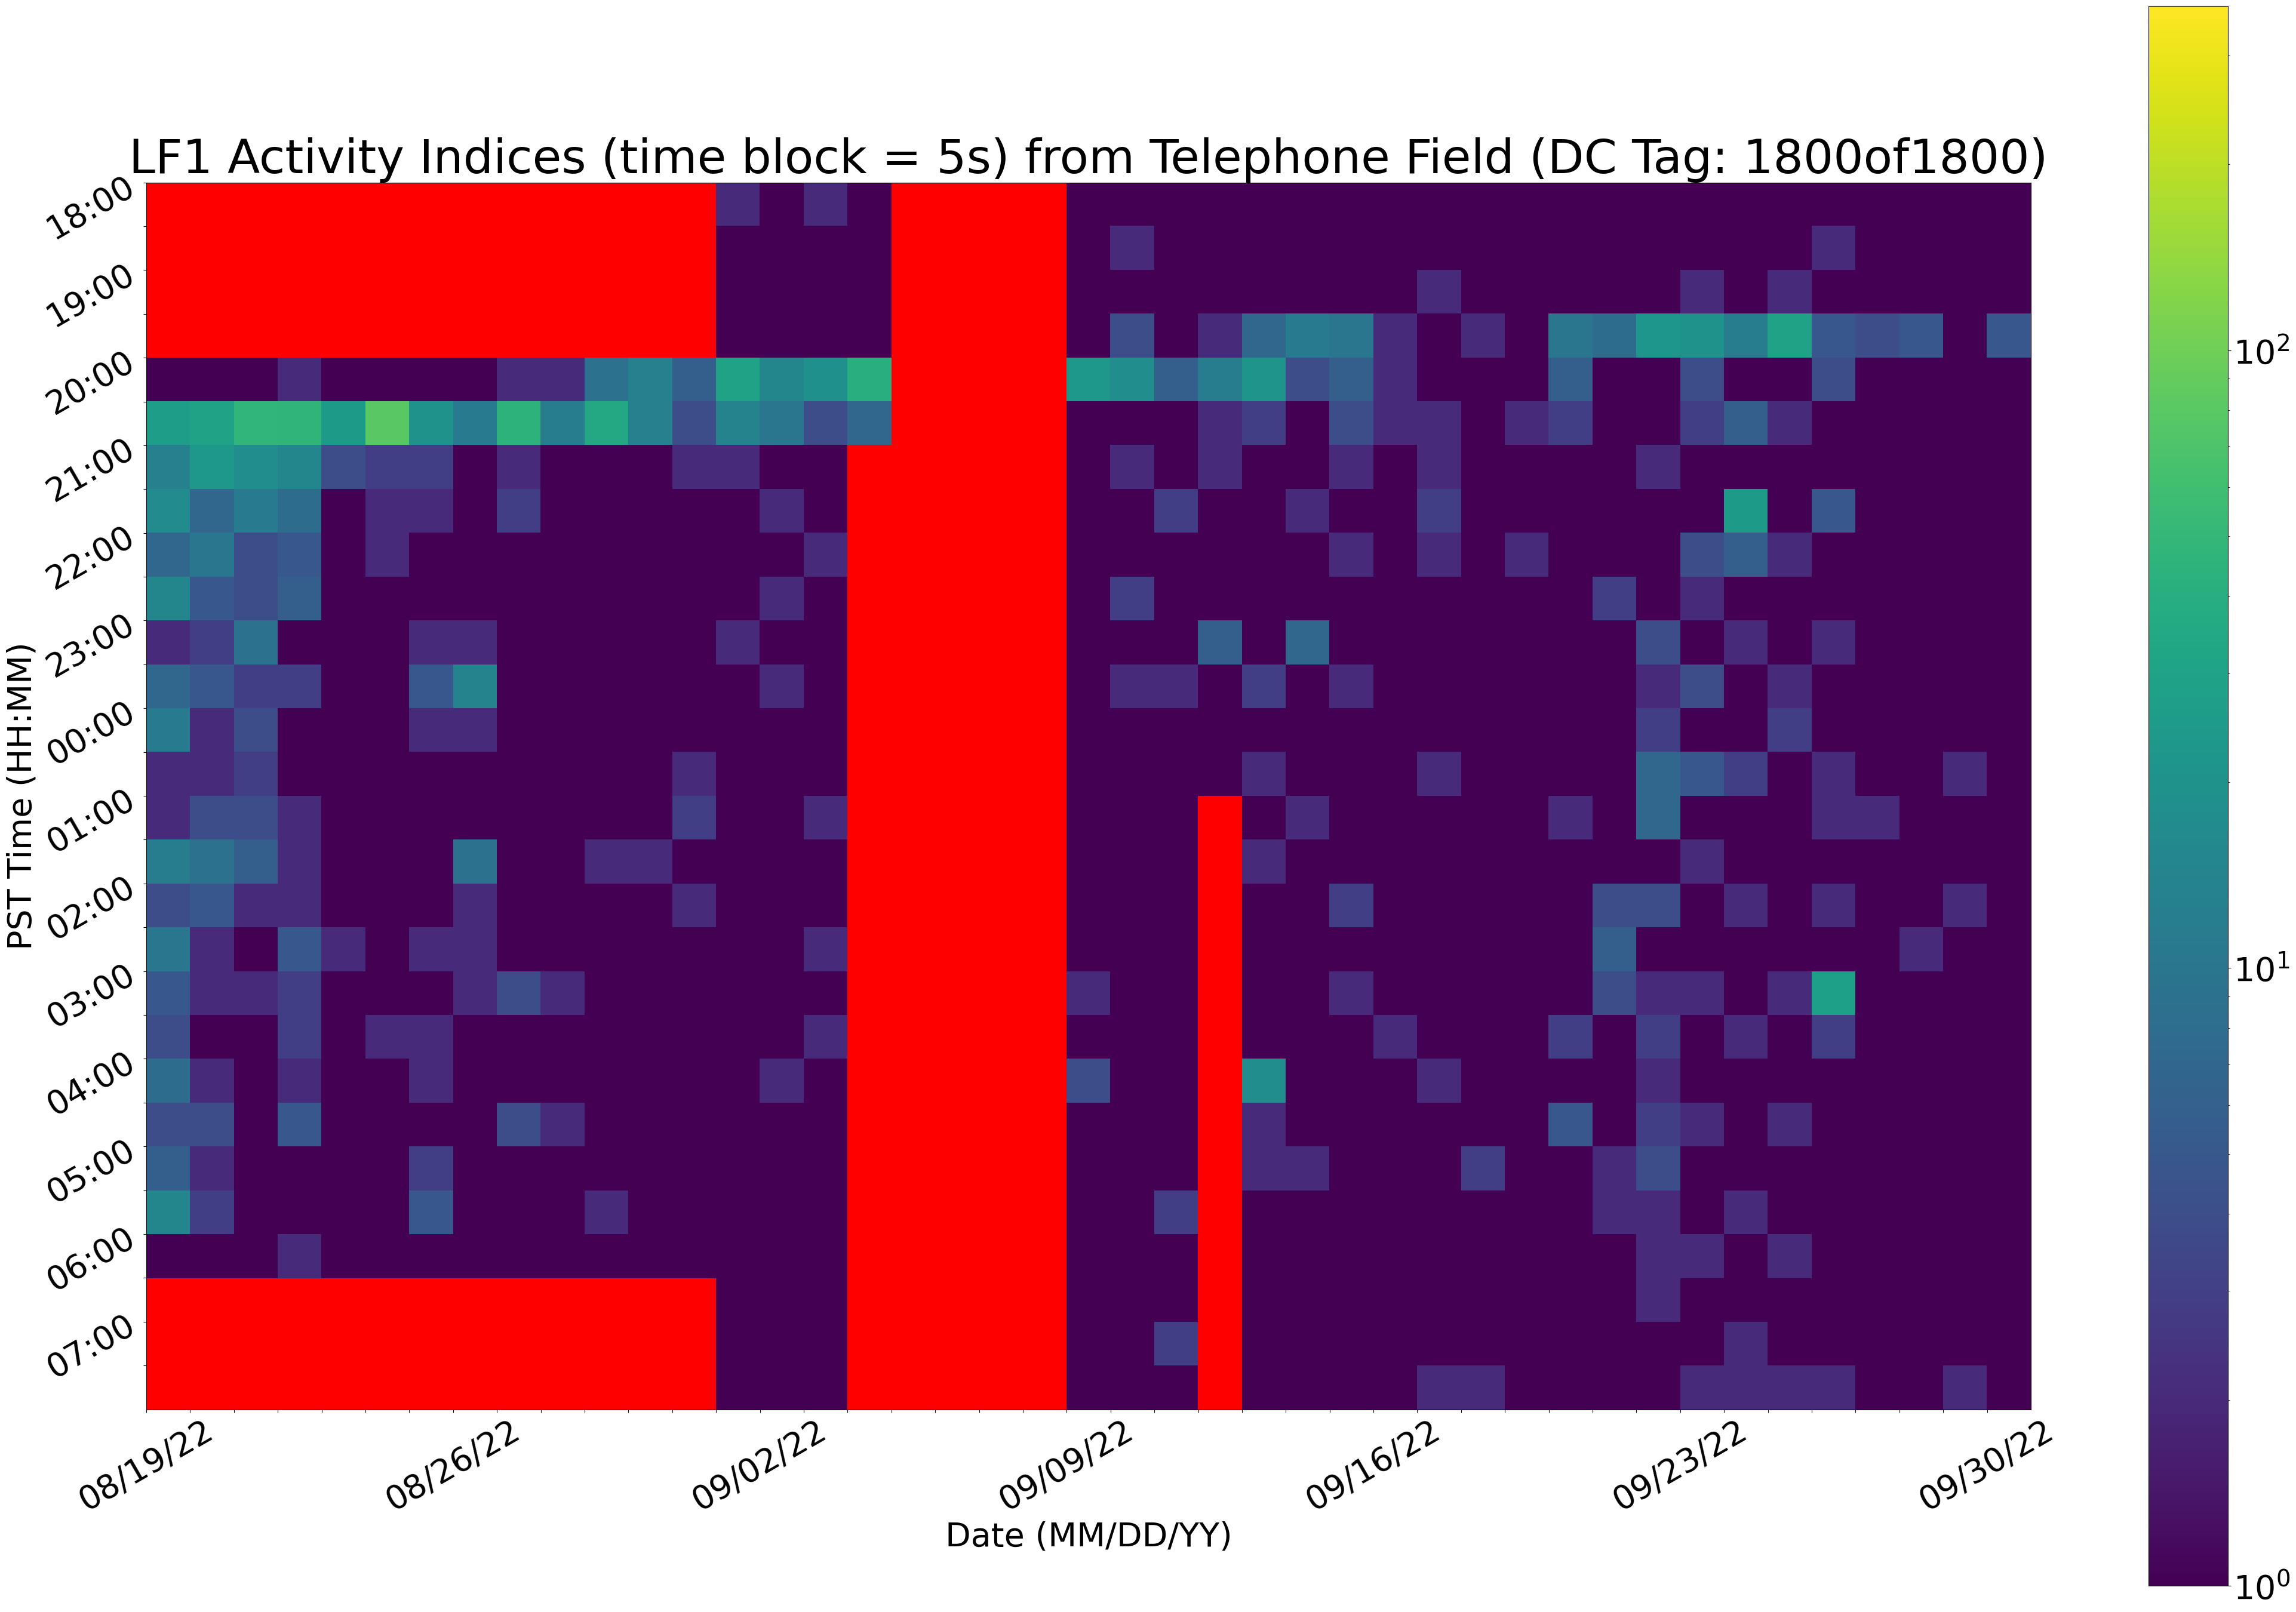

Telephone HF1


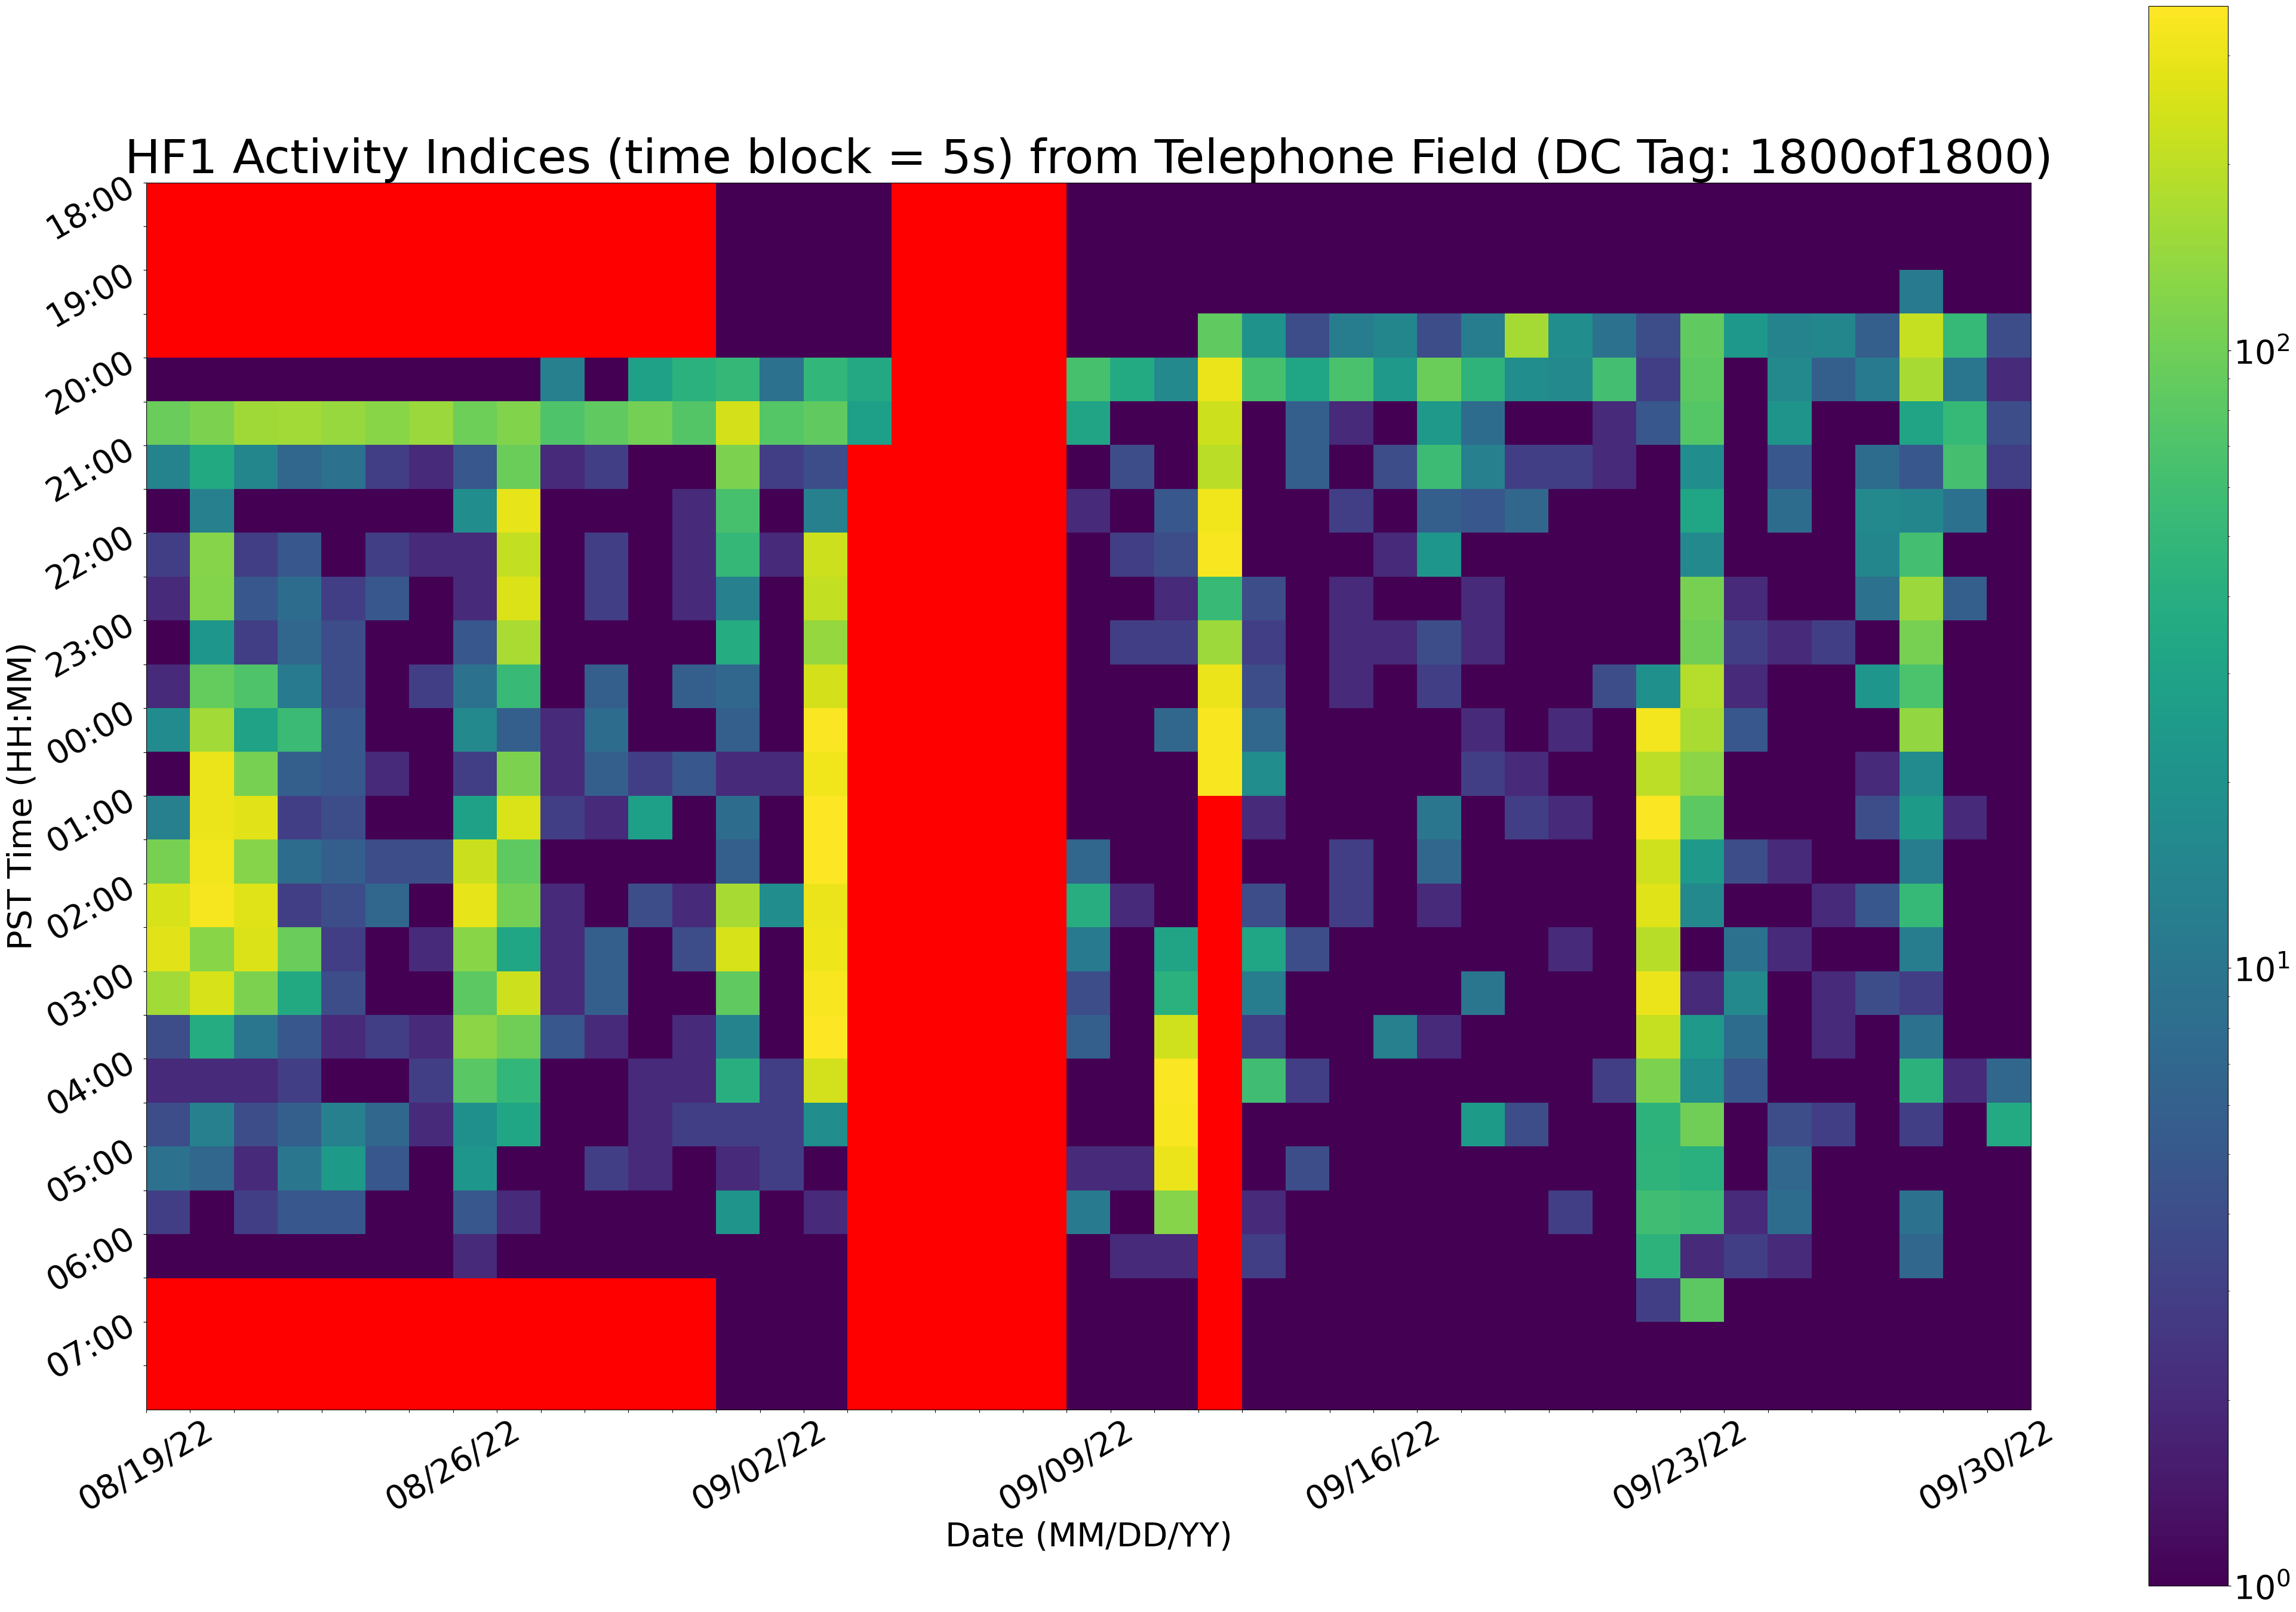

Telephone HF2


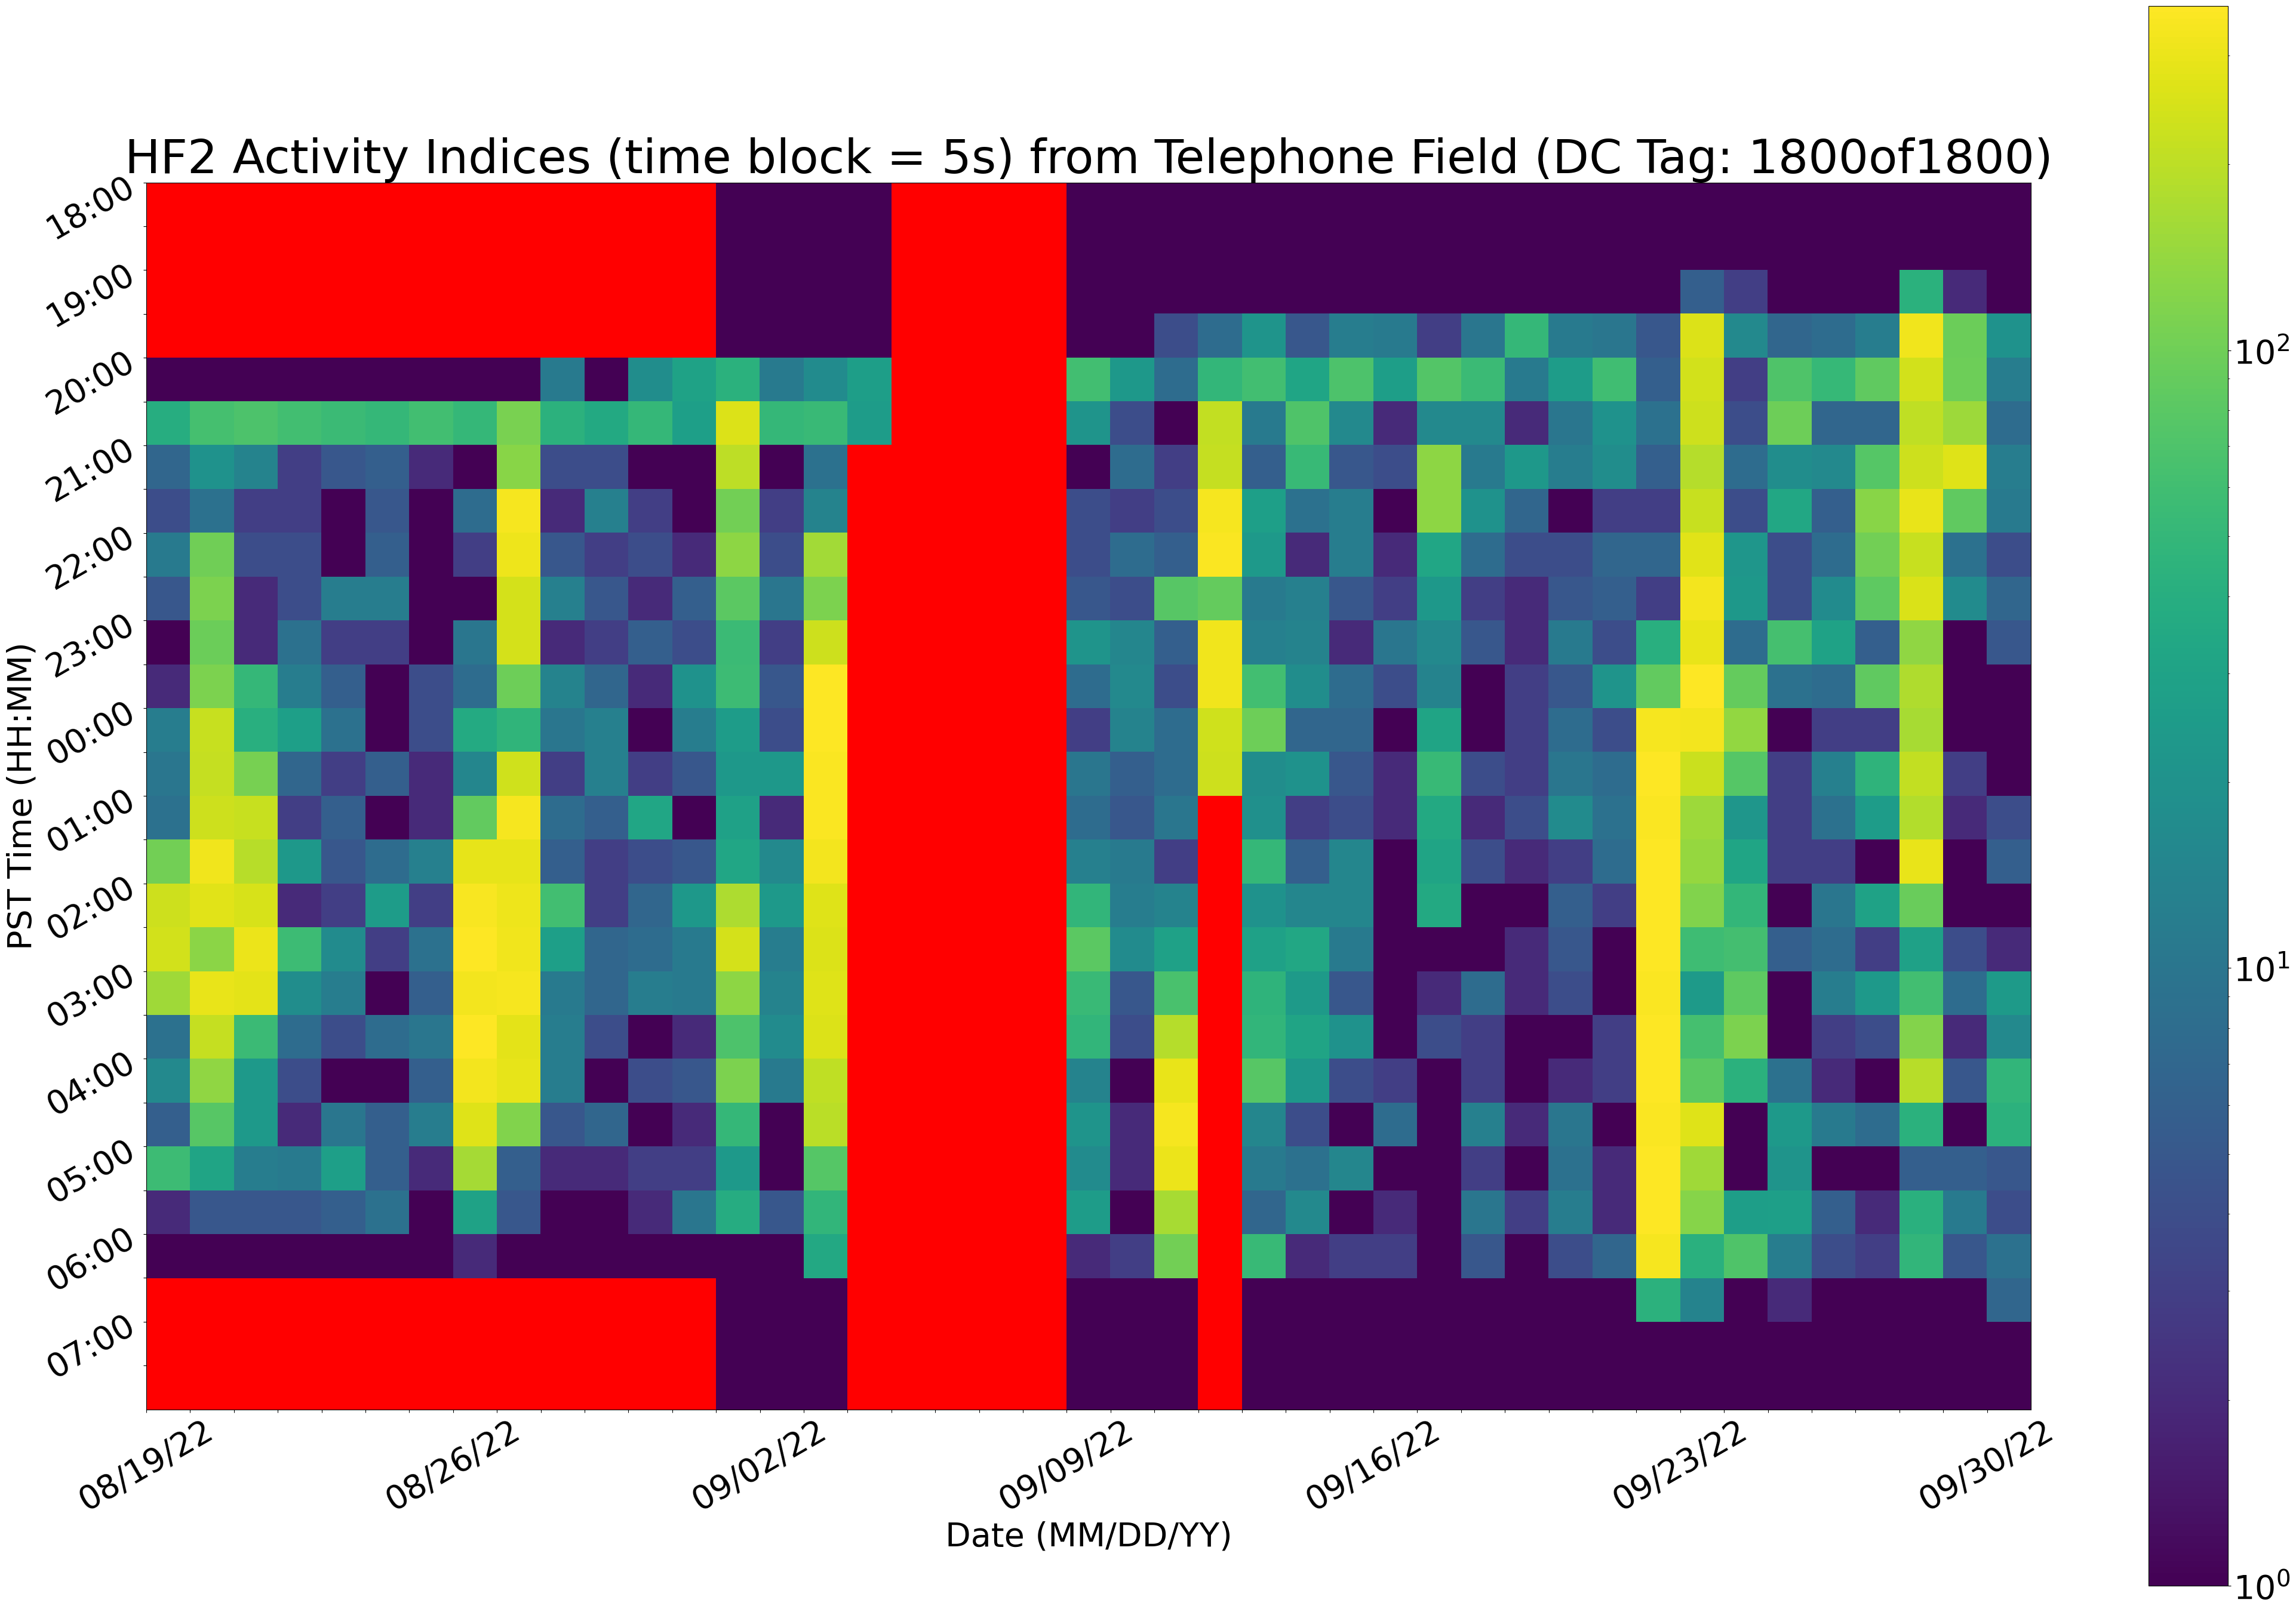

In [4]:
cycle_lengths = [1800, 360]
percent_ons = [0.1667]
specific_dc_tag = "1800of1800"

pipeline_params = dict()
pipeline_params['assemble_location_summary'] = False
pipeline_params["read_csv"] = False
pipeline_params["save_activity_grid"] = True
pipeline_params["save_presence_grid"] = True
pipeline_params["save_dc_night_comparisons"] = True
pipeline_params["save_activity_dc_comparisons"] = True
pipeline_params["save_presence_dc_comparisons"] = True
pipeline_params["show_plots"] = True
pipeline_params["show_PST"] = True

data_params = dict()
data_params["cycle_lengths"] = cycle_lengths
data_params["percent_ons"] = percent_ons
dc_tags = ss.get_list_of_dc_tags(data_params["cycle_lengths"], data_params["percent_ons"])
data_params["dc_tags"] = dc_tags
data_params["cur_dc_tag"] = specific_dc_tag
data_params['resolution_in_min'] = '30'
data_params['index_time_block_in_secs'] = '5'
data_params['recording_start'] = '01:00'
data_params['recording_end'] = '15:00'

# for site_key in FREQ_GROUPS.keys():
site_key = 'Telephone'
for type_key in FREQ_GROUPS[site_key].keys():
    print(site_key, type_key)
    data_params["site_name"] = SITE_NAMES[site_key]
    data_params["site_tag"] = site_key
    data_params["type_tag"] = type_key

    file_paths = get_file_paths(data_params)

    activity_inds_arr = pipeline.run_for_inds(data_params, pipeline_params, file_paths)
    plotting.plot_activity_grid_for_inds(activity_inds_arr, data_params, pipeline_params, file_paths)
    plotting.plot_dc_indices_activity_comparisons_per_scheme(activity_inds_arr, data_params, pipeline_params, file_paths)